In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer


sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Load the dataset
dataset_url='https://www.kaggle.com/datasets/blastchar/telco-customer-churn'
od.download(dataset_url)

Skipping, found downloaded files in ".\telco-customer-churn" (use force=True to force download)


In [3]:
data_dir = './telco-customer-churn'
os.listdir(data_dir)

['.ipynb_checkpoints', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
train_csv = data_dir + '/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [23]:
df=pd.read_csv(train_csv)

#### Data Exploration and cleaning

In [24]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [25]:
first_row_values = df.head(1).values[0]
print(first_row_values)

['7590-VHVEG' 'Female' 0 'Yes' 'No' 1 'No' 'No phone service' 'DSL' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Month-to-month' 'Yes' 'Electronic check' 29.85
 '29.85' 'No']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


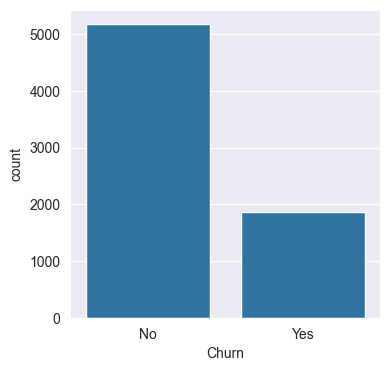

In [30]:
sns.countplot(x='Churn', data=df)
plt.show()

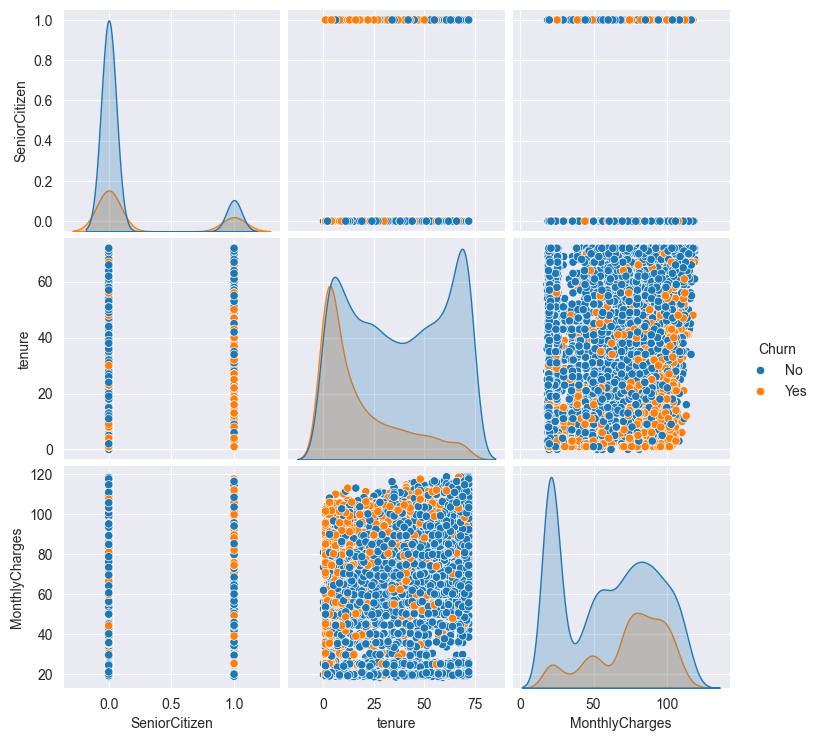

In [31]:
sns.pairplot(df, hue='Churn')
plt.show()

#### Data Preprocessing

In [32]:
df.dropna(inplace=True)

In [33]:
df.drop('customerID',inplace=True,axis=1)

In [34]:
# Convert categorical variables
#SeniorCitizen is also a categorical variable but is already in converted form 
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [35]:
# Convert remaining categorical variables using One Hot Encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)

for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [36]:
#Convert Total Charges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(0)
print(df['TotalCharges'].dtype)

imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])
print(df['TotalCharges'].isnull().sum())

11
float64
0


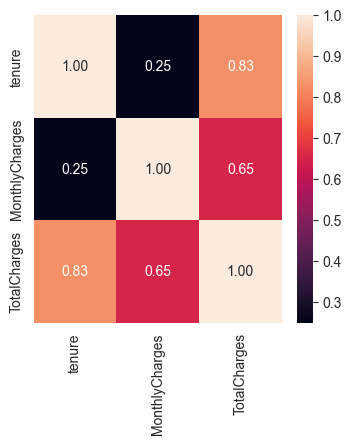

In [38]:
#Feature Selection
numeric_df=df[numeric_cols]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()


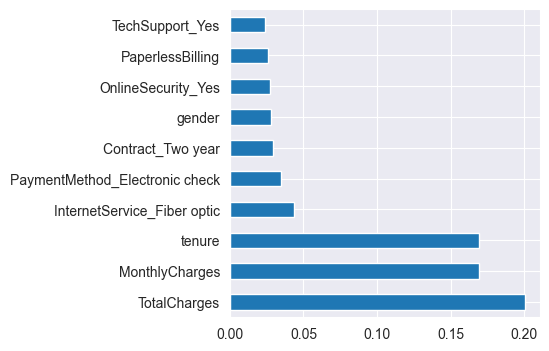

In [39]:
# Feature importance using Random Forest
X = df.drop('Churn', axis=1)
y = df['Churn']
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
# feature_importances.plot(kind='barh')
plt.show()

#### Model Training 

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
# Predictions
y_pred_test = model.predict(X_test)

In [43]:
# Evaluation
print(confusion_matrix(y_test, y_pred_test))
# print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred_test))

[[1406  133]
 [ 304  270]]
Accuracy: 0.7931850449597728


In [44]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))
def all_no(inputs):
    return np.full(len(inputs), 0)
def all_yes(inputs):
    return np.full(len(inputs), 1)

In [45]:
accuracy_score(y_test, random_guess(y_test))

0.5059157595835305

In [46]:
accuracy_score(y_test, all_no(y_test))

0.7283483199242783

In [47]:
accuracy_score(y_test, all_yes(y_test))

0.2716516800757217

In [48]:
# Filter rows where Churn is "Yes" , to evaluate model 
churn_yes_data = df[df['Churn'] == 1].head(1)  # Assuming you want the first row with Churn = "Yes"

X_yes= churn_yes_data.drop('Churn', axis=1)
y_yes= churn_yes_data['Churn']
y_pred_yes=model.predict(X_yes)
accuracy_score(y_yes, y_pred_yes)

1.0

In [49]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,1,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,0,...,0,0,0,0,0,0,0,0,0,1


#### Model Tuning

In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best parameters: {best_params}")
# print(f"Best cross-validation score: {best_score}")

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Test set accuracy: {accuracy}")
# print("Classification report:\n", classification_report(y_test, y_pred))


#### Model Evaluation

In [24]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 99.84%


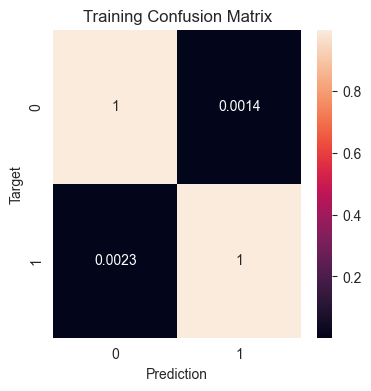

In [25]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

Accuracy: 79.22%


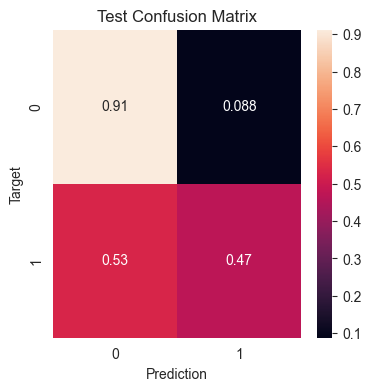

In [26]:
test_preds = predict_and_plot(X_test, y_test, 'Test')

In [27]:
from sklearn.model_selection import cross_val_score

# Validate the model using cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=10)

print('Cross-validation scores:', cross_val_scores)
print('Mean cross-validation score:', cross_val_scores.mean())

Cross-validation scores: [0.80283688 0.81702128 0.79432624 0.79119318 0.77840909 0.75284091
 0.81534091 0.79261364 0.79829545 0.80255682]
Mean cross-validation score: 0.794543439716312


In [28]:
print(f"Cross-Validation Mean Accuracy: {cross_val_scores.mean()}")
print(f"Test Accuracy: {accuracy_score(y_test,y_pred_test)}")

Cross-Validation Mean Accuracy: 0.794543439716312
Test Accuracy: 0.792238523426408


The cross validation accuracy is very similar to the test accuracy , which suggests that the model generalises well to unseen data 

In [50]:
#Save the model
import pickle

with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)